In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from IPython.display import HTML
from skimage import exposure
from skimage import filters
from skimage import morphology
from skimage.transform import (hough_line, hough_line_peaks, hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as pylab
from matplotlib import cm
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

In [2]:
# mommy 111111
# size = 32
# image_size = 255
# channels = 3

In [3]:
# dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     'archive\\train',
#     seed = 123,
#     shuffle = True,
#     batch_size=size,
#     image_size=(image_size, image_size)
# )


Found 2900 files belonging to 4 classes.


In [4]:
# class_names = dataset.class_names
# class_names

['Closed', 'Open', 'no_yawn', 'yawn']

In [25]:
import os
import cv2
from skimage.filters import sobel
from PIL import Image, ImageEnhance
from skimage import data
from skimage.exposure import histogram

main_folder = 'I:/Image Processing/archive/train'

def gaussian_noise_reduction(image, kernel_size=(5, 5), sigma_x=0):
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma_x)
    return blurred_image

# Define the preprocessing functions for eye
def preprocessed_eye(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    equalized_image = cv2.equalizeHist(gray)
    
    # Compute the elevation map using Sobel operator for edge detection
    sobel_x = cv2.Sobel(equalized_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(equalized_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine the gradients to obtain the magnitude of the gradient
    magnitude_gradient = cv2.magnitude(sobel_x, sobel_y)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(magnitude_gradient, (5, 5), 0)
    
    # Calculate the Laplacian
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    
    # Apply unsharp masking
    sharpened = gray + 1.0 * laplacian
    
    # Clip values to the range [0, 255]
    sharpened = np.clip(sharpened, 0, 255)
    
    # Convert back to uint8
    sharpened = np.uint8(sharpened)

    return sharpened


# Load the pre-trained Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def preprocessed_face(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=4, minSize=(30, 30))
    
    # Draw rectangles around the detected faces on the original image
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    return image


# Create the output folder if it doesn't exist
output_folder = 'I:/output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each category
for category in os.listdir(main_folder):
    category_folder = os.path.join(main_folder, category)
    
    # Ensure it's a directory
    if os.path.isdir(category_folder):
        print("Processing category:", category)
        
        # Create the category output folder if it doesn't exist
        output_category_folder = os.path.join(output_folder, category)
        if not os.path.exists(output_category_folder):
            os.makedirs(output_category_folder)
        
        # Check if the category folder corresponds to 'Open' or 'Close'
        if category == 'Open' or category == 'Closed':
            # Define the preprocessing function for 'Open' and 'Close' categories
            preprocessing_func = preprocessed_eye 

        else:
            # Define a different preprocessing function for other categories
            preprocessing_func = preprocessed_face  # No preprocessing
            
        # Iterate over images in the category folder
        for filename in os.listdir(category_folder):
            image_path = os.path.join(category_folder, filename)
            
            # Read the image
            image = cv2.imread(image_path)
            
            # Check if the image was read successfully
            if image is None:
                print("Error reading image:", image_path)
                continue

            # Apply preprocessing function
            preprocessed_image = preprocessing_func(image)
            
            # Save the preprocessed image
            output_image_path = os.path.join(output_category_folder, filename)
            if not cv2.imwrite(output_image_path, preprocessed_image):
                print("Error saving image:", output_image_path)



Processing category: Closed
Processing category: no_yawn
Processing category: Open
Processing category: yawn


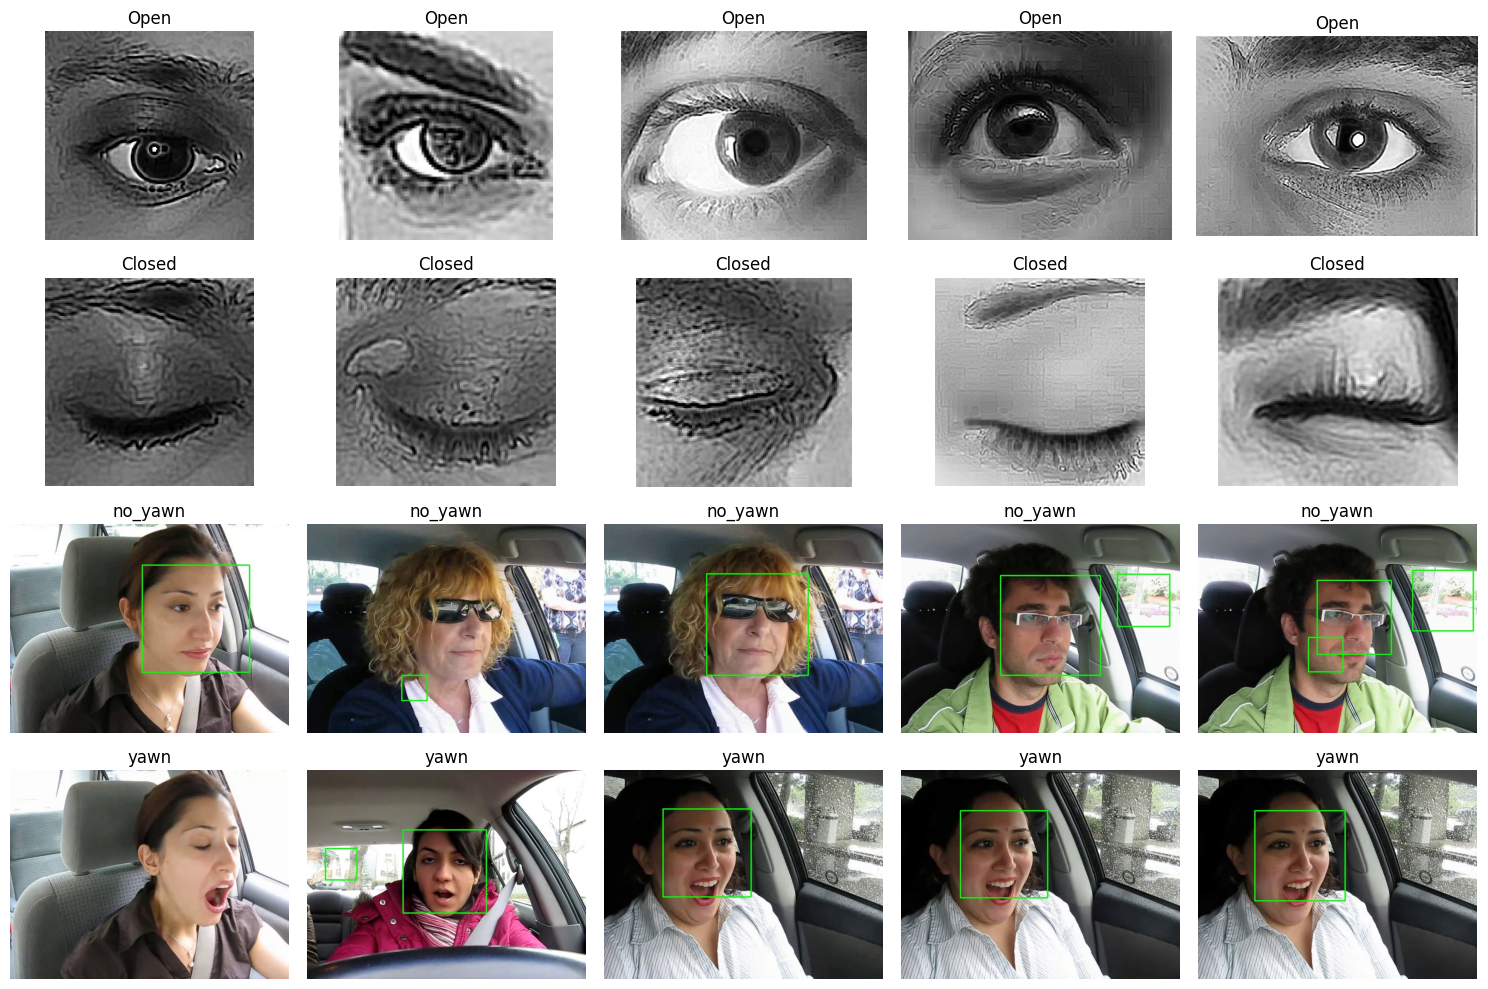

In [26]:
# Function to load and display a sample of preprocessed images
def display_sample_images(output_folder, categories, num_samples=5):
    fig, axs = plt.subplots(len(categories), num_samples, figsize=(15, 10))
    
    for i, category in enumerate(categories):
        category_folder = os.path.join(output_folder, category)
        
        # Check if the category folder exists
        if not os.path.exists(category_folder):
            print(f"Error: Category folder '{category_folder}' not found.")
            return
        
        # List all preprocessed images in the category folder
        image_files = os.listdir(category_folder)
        
        # Select a random sample of images from the category
        sample_images = image_files[:num_samples]
        
        # Display each sample image
        for j, image_file in enumerate(sample_images):
            image_path = os.path.join(category_folder, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image from BGR to RGB for display
            axs[i, j].imshow(image)
            axs[i, j].set_title(category)
            axs[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Specify the output folder containing the preprocessed images
output_folder = 'I:/output'

# Specify the categories (subfolders) to display samples from
categories = ['Open', 'Closed', 'no_yawn', 'yawn']  

# Display a sample of preprocessed images for each category
display_sample_images(output_folder, categories)

